In [30]:
#SVM template
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn;
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb = pd.read_csv("abnb_listings_rdcd.csv")
del abnb["Unnamed: 0"]
abnb.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

In [31]:
X = abnb.drop(['id', 'description'], 1)
y = abnb['reviews_per_month'] > 3

In [34]:
X.head()

,latitude,longitude,location,space,price,host,rating,reviews_per_month
0,37.785217,-122.488655,11.875956,-1.319244,386.666667,1,89,0.28
1,37.781505,-122.504754,11.875956,-1.416978,142.333333,1,92,2.33
2,37.781797,-122.492492,11.875955,5.781405,940.000000,1,100,0.36
3,37.781564,-122.494424,11.875955,-1.404158,136.666667,1,94,1.13
4,37.783888,-122.508557,11.875958,-1.582193,178.333333,1,92,6.09


In [43]:
from sklearn.svm import LinearSVC

X2 = X[['latitude', 'longitude']].as_matrix()
y2 = y.as_matrix()

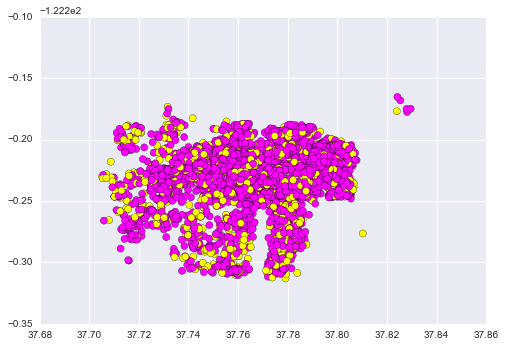

In [45]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='spring')

In [46]:
from sklearn.svm import SVC

# SVC is too slow, just use linear SVC
# svc = SVC(kernel='linear').fit(X2, y2)
# rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X2, y2)
# poly_svc = SVC(kernel='poly', degree=3).fit(X2, y2)
lin_svc = LinearSVC().fit(X2, y2)

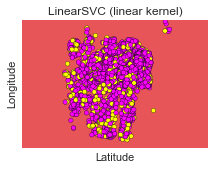

In [27]:
x_min, x_max = X2[:, 0].min() - 0.05, X2[:, 0].max() + 0.05
y_min, y_max = X2[:, 1].min() - 0.01, X2[:, 1].max() + 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

i = 0
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
plt.subplot(2, 2, i + 1)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot also the training points
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap='spring')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('LinearSVC (linear kernel)')
plt.show()